In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
df = pd.read_csv('data\RetailOnline_analysis.csv')
df.head(5)

,Unnamed: 0,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,CustomerID,Country,Year,Month,Day,Hour,WeekDay,revenue
0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010,12,1,8,Wed,15.30
1,1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1,8,Wed,20.34
2,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010,12,1,8,Wed,22.00
3,3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1,8,Wed,20.34
4,4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1,8,Wed,20.34


In [17]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [18]:
df['InvoiceMonth'] = df['InvoiceDate'].apply(lambda x: x.strftime('%Y-%m'))
df['CohortMonth'] = df.groupby('CustomerID')['InvoiceMonth'].transform('min')

In [19]:
cohort_data = df.groupby(['CohortMonth', 'InvoiceMonth'])['CustomerID'].nunique().reset_index()
cohort_data

,CohortMonth,InvoiceMonth,CustomerID
0,2010-12,2010-12,885
1,2010-12,2011-01,324
2,2010-12,2011-02,286
3,2010-12,2011-03,340
4,2010-12,2011-04,321
...,...,...,...
86,2011-10,2011-11,86
87,2011-10,2011-12,41
88,2011-11,2011-11,323
89,2011-11,2011-12,36


In [37]:
cohort_data.rename(columns={'CustomerID': 'CustomerCount'}, inplace=True)
cohort_data

,CohortMonth,InvoiceMonth,CustomerCount
0,2010-12,2010-12,885
1,2010-12,2011-01,324
2,2010-12,2011-02,286
3,2010-12,2011-03,340
4,2010-12,2011-04,321
...,...,...,...
86,2011-10,2011-11,86
87,2011-10,2011-12,41
88,2011-11,2011-11,323
89,2011-11,2011-12,36


In [60]:
cohort_counts = cohort_data.pivot_table(index='CohortMonth', columns='InvoiceMonth', values='CustomerCount')
cohort_counts['CustomerCount'] = cohort_counts.apply(lambda row: row.max(), axis=1)
cohort_counts = cohort_counts.reindex(columns=['CustomerCount'] + list(cohort_counts.columns[:-1]))
cohort_counts

InvoiceMonth,CustomerCount,2010-12,2011-01,2011-02,2011-03,2011-04,2011-05,2011-06,2011-07,2011-08,2011-09,2011-10,2011-11,2011-12
CohortMonth,,,,,,,,,,,,,,
2010-12,885.0,885.0,324.0,286.0,340.0,321.0,352.0,321.0,309.0,313.0,350.0,331.0,445.0,235.0
2011-01,417.0,NaN,417.0,92.0,111.0,96.0,134.0,120.0,103.0,101.0,125.0,136.0,152.0,49.0
2011-02,380.0,NaN,NaN,380.0,71.0,71.0,108.0,103.0,94.0,96.0,106.0,94.0,116.0,26.0
2011-03,452.0,NaN,NaN,NaN,452.0,68.0,114.0,90.0,101.0,76.0,121.0,104.0,126.0,39.0
2011-04,300.0,NaN,NaN,NaN,NaN,300.0,64.0,61.0,63.0,59.0,68.0,65.0,78.0,22.0
2011-05,284.0,NaN,NaN,NaN,NaN,NaN,284.0,54.0,49.0,49.0,59.0,66.0,75.0,27.0
2011-06,242.0,NaN,NaN,NaN,NaN,NaN,NaN,242.0,42.0,38.0,64.0,56.0,81.0,23.0
2011-07,188.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,188.0,34.0,39.0,42.0,51.0,21.0
2011-08,169.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,169.0,35.0,42.0,41.0,21.0


In [61]:
cohort_rate = cohort_counts.divide(cohort_counts.iloc[:,0],axis=0).round(2)
cohort_rate

InvoiceMonth,CustomerCount,2010-12,2011-01,2011-02,2011-03,2011-04,2011-05,2011-06,2011-07,2011-08,2011-09,2011-10,2011-11,2011-12
CohortMonth,,,,,,,,,,,,,,
2010-12,1.0,1.0,0.37,0.32,0.38,0.36,0.40,0.36,0.35,0.35,0.40,0.37,0.50,0.27
2011-01,1.0,NaN,1.00,0.22,0.27,0.23,0.32,0.29,0.25,0.24,0.30,0.33,0.36,0.12
2011-02,1.0,NaN,NaN,1.00,0.19,0.19,0.28,0.27,0.25,0.25,0.28,0.25,0.31,0.07
2011-03,1.0,NaN,NaN,NaN,1.00,0.15,0.25,0.20,0.22,0.17,0.27,0.23,0.28,0.09
2011-04,1.0,NaN,NaN,NaN,NaN,1.00,0.21,0.20,0.21,0.20,0.23,0.22,0.26,0.07
2011-05,1.0,NaN,NaN,NaN,NaN,NaN,1.00,0.19,0.17,0.17,0.21,0.23,0.26,0.10
2011-06,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.00,0.17,0.16,0.26,0.23,0.33,0.10
2011-07,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00,0.18,0.21,0.22,0.27,0.11
2011-08,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00,0.21,0.25,0.24,0.12


In [65]:
cohort_analysis = cohort_counts.sum().reset_index()
cohort_analysis['percentage'] = cohort_analysis[0]*100/4338
cohort_analysis['percentage'] = cohort_analysis['percentage'].round(2)
cohort_analysis.rename(columns={0:'Customer'},inplace=True)
cohort_analysis

,InvoiceMonth,Customer,percentage
0,CustomerCount,4338.0,100.00
1,2010-12,885.0,20.40
2,2011-01,741.0,17.08
3,2011-02,758.0,17.47
4,2011-03,974.0,22.45
5,2011-04,856.0,19.73
6,2011-05,1056.0,24.34
7,2011-06,991.0,22.84
8,2011-07,949.0,21.88
9,2011-08,935.0,21.55


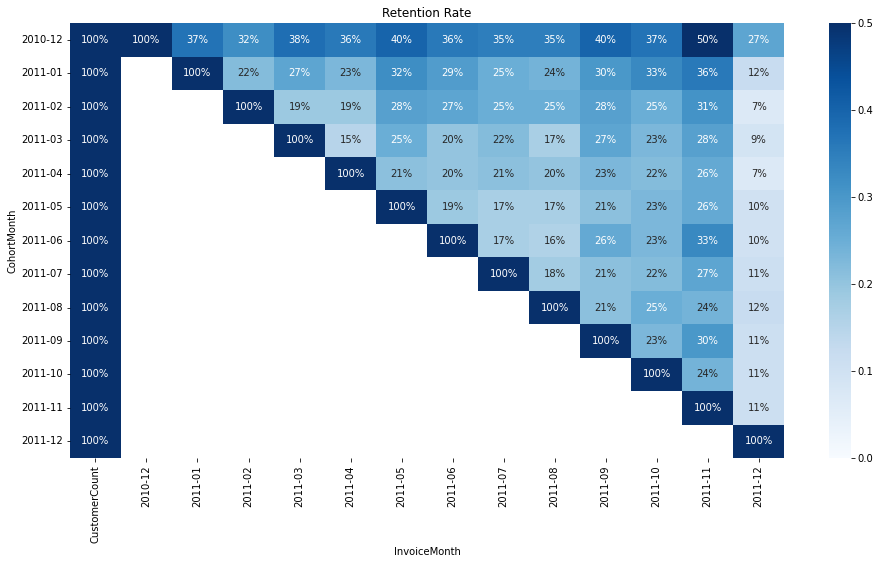

,InvoiceMonth,Customer,percentage
0,CustomerCount,4338.0,100.00
1,2010-12,885.0,20.40
2,2011-01,741.0,17.08
3,2011-02,758.0,17.47
4,2011-03,974.0,22.45
5,2011-04,856.0,19.73
6,2011-05,1056.0,24.34
7,2011-06,991.0,22.84
8,2011-07,949.0,21.88
9,2011-08,935.0,21.55


In [70]:
plt.figure(figsize=(16, 8))
plt.title('Retention Rate')
sns.heatmap(data=cohort_rate, annot=True, fmt='.0%', vmin=0.0, vmax=0.5, cmap='Blues')
plt.show()
cohort_analysis